C:\Users\USER\AppData\Local\Temp\ipykernel_10824\1778448484.py:112: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([control_a, treatment_b], labels=['Control A', 'Treatment B'])


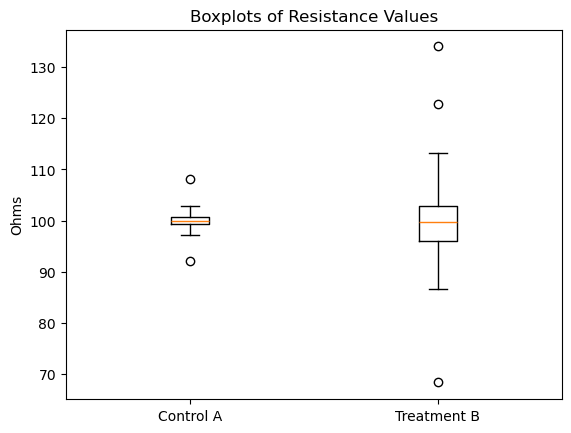

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tkinter as tk
from tkinter import scrolledtext
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Filename of the CSV
filename = "exploratory_problems_workbook - Electronics_Resistors.csv"

# Read the data
df = pd.read_csv(filename)

# Separate into Control_A and Treatment_B
control_a = df[df['Sample'] == 'Control_A']['Value'].values
treatment_b = df[df['Sample'] == 'Treatment_B']['Value'].values

# Task 2: Descriptive stats
def compute_descriptive_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    sd = np.std(data)
    return mean, median, q1, q3, iqr, sd

mean_a, median_a, q1_a, q3_a, iqr_a, sd_a = compute_descriptive_stats(control_a)
mean_b, median_b, q1_b, q3_b, iqr_b, sd_b = compute_descriptive_stats(treatment_b)

# Task 3: Deciles
def compute_deciles(data):
    return [np.percentile(data, i*10) for i in range(1, 10)]

deciles_a = compute_deciles(control_a)
deciles_b = compute_deciles(treatment_b)

# Interpretation of D1 and D9
d1_interp = "D1 (10th percentile) is the value below which 10% of the data lies."
d9_interp = "D9 (90th percentile) is the value above which 10% of the data lies."

# Task 4: Outliers
def find_outliers(data, q1, q3, iqr):
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

outliers_a = find_outliers(control_a, q1_a, q3_a, iqr_a)
outliers_b = find_outliers(treatment_b, q1_b, q3_b, iqr_b)

outliers_common = "Outliers are more common in Treatment_B" if len(outliers_b) > len(outliers_a) else "Outliers are more common in Control_A" if len(outliers_a) > len(outliers_b) else "Outliers are equally common in both."

# Task 5: Highest three resistance values overall and their z-scores
all_values = df['Value'].values
all_samples = df['Sample'].values
sorted_indices = np.argsort(all_values)[::-1][:3]
highest_three = all_values[sorted_indices]
highest_samples = all_samples[sorted_indices]

z_scores = []
for val, sample in zip(highest_three, highest_samples):
    if sample == 'Control_A':
        z = (val - mean_a) / sd_a
    else:
        z = (val - mean_b) / sd_b
    z_scores.append(z)

plausible = ["Plausible" if abs(z) < 3 else "Faulty" for z in z_scores]

# Task 6: Interpretations
consistent_supplier = "Control_A" if iqr_a < iqr_b else "Treatment_B"
outliers_impact = "Outliers in resistor values can lead to inconsistent circuit behavior, potential overheating, or failure in sensitive electronics, affecting overall performance and reliability."
choice = "As a design engineer, I would choose Control_A for its higher consistency and fewer outliers, ensuring better reliability in circuits."

# Create GUI
root = tk.Tk()
root.title("Resistor Analysis")

# Text area for results
text_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, width=80, height=20)
text_area.pack(pady=10)

# Insert results
text_area.insert(tk.INSERT, "Task 2: Descriptive Stats\n")
text_area.insert(tk.INSERT, f"Control_A: Mean={mean_a:.2f}, Median={median_a:.2f}, Q1={q1_a:.2f}, Q3={q3_a:.2f}, IQR={iqr_a:.2f}, SD={sd_a:.2f}\n")
text_area.insert(tk.INSERT, f"Treatment_B: Mean={mean_b:.2f}, Median={median_b:.2f}, Q1={q1_b:.2f}, Q3={q3_b:.2f}, IQR={iqr_b:.2f}, SD={sd_b:.2f}\n\n")

text_area.insert(tk.INSERT, "Task 3: Deciles\n")
text_area.insert(tk.INSERT, f"Control_A Deciles (D1-D9): {', '.join([f'{d:.2f}' for d in deciles_a])}\n")
text_area.insert(tk.INSERT, f"Treatment_B Deciles (D1-D9): {', '.join([f'{d:.2f}' for d in deciles_b])}\n")
text_area.insert(tk.INSERT, f"Interpretation: {d1_interp} {d9_interp}\n\n")

text_area.insert(tk.INSERT, "Task 4: Outliers\n")
text_area.insert(tk.INSERT, f"Control_A Outliers: {', '.join([f'{o:.2f}' for o in outliers_a])}\n")
text_area.insert(tk.INSERT, f"Treatment_B Outliers: {', '.join([f'{o:.2f}' for o in outliers_b])}\n")
text_area.insert(tk.INSERT, f"Discussion: {outliers_common}\n\n")

text_area.insert(tk.INSERT, "Task 5: Z-scores for highest three\n")
for i, (val, z, p) in enumerate(zip(highest_three, z_scores, plausible)):
    text_area.insert(tk.INSERT, f"Highest {i+1}: {val:.2f} (Z={z:.2f}, {p})\n")
text_area.insert(tk.INSERT, "\n")

text_area.insert(tk.INSERT, "Task 6: Interpretation\n")
text_area.insert(tk.INSERT, f"More consistent: {consistent_supplier}\n")
text_area.insert(tk.INSERT, f"Outliers impact: {outliers_impact}\n")
text_area.insert(tk.INSERT, f"Choice: {choice}\n")

# Task 1: Boxplots
fig, ax = plt.subplots()
ax.boxplot([control_a, treatment_b], labels=['Control A', 'Treatment B'])
ax.set_title('Boxplots of Resistance Values')
ax.set_ylabel('Ohms')

# Embed plot in Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()

root.mainloop()